# Getting and Using OSM Data in Pytyhon

In this section we focus on two python packages commonly utilised to obtain and assess **Open Street Map** ([OSM](https://www.openstreetmap.org/)) data, namely [OSMnx](https://osmnx.readthedocs.io/en/stable/#) and [Pyrosm](https://pyrosm.readthedocs.io/en/latest/#), to complete nescessary processing steps to work with OSM data for transport research comprising:

1.   Downloading OSM data, for both pre-defined areas and user specified areas 
2.   Plotting OSM data, to understand the data and its structure as well as visualising it

<br><br>
Firstly we must install the required packages for our analysis.<br>
This analysis has been conducted in an interactive notebook running Python 3.7.13 (check your current version by running ```!python --version``` in a new code cell ) As such, packages can be installed using the pip package installer as shown below. <br><br> The ```!``` operator lets your notebook know that you do not want this line to be interpreted as python code, rather an entry to the terminal running python.<br><br> 

Note that if you are running Python on a local machine (computer or laptop, rather than over a server) in a conda environment you must install packages from the conda servers using a different command line in your terminal(for example ```conda install -c conda-forge pyrosm``` rather than the pip ```!pip install pyrosm```) To see if your desired package is supported by the conda package installer you can [search](https://anaconda.org/) for your package using the search bar in the centre of the anaconda homepage.

In [59]:
!pip install pyrosm
!pip install osmnx
!pip install geemap

     |████████████████████████████████| 95 kB 2.5 MB/s 
     |████████████████████████████████| 1.0 MB 33.1 MB/s 
     |████████████████████████████████| 11.2 MB 43.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 930 kB 41.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incomp


Firstly we must import the required packages for our analysis

In [60]:
import pyrosm
import geemap 

In [61]:
# Load dataset places stored within pyrosm (provided from providers BBBike or Geofabrik) 
available_places = pyrosm.data.available
available_places.keys()
'Leeds' in available_places['cities']

True

In [ ]:
# Gets data from pyrosm providers (BBBike or Geofabrik) and stores in /temp directory - file can be saved to a user specified
# location with additional arguments i.e. get_data(place_name, directory='Desired location to save file')
place_name = 'Leeds'
file_path = pyrosm.get_data(place_name)
print('Data downloaded to:', file_path)

Data downloaded to: /tmp/pyrosm/Leeds.osm.pbf


In [ ]:
# Initialises the OSM object that parses .osm.pbf files
osm = pyrosm.OSM(fp)
print('osm type:', type(osm))

osm type: <class 'pyrosm.pyrosm.OSM'>


Notice that the osm (lower case) variable is actually the reader instance (type: ```<class 'pyrosm.pyrosm.OSM'>```) for the given .osm.pbf datatset. As such this (osm) variable should always be used to make the calls for fetching different network datasets from the OSM pbf file.

There are a number of ways to request network data from the osm.pbf file, most noteable and of use in this demonstration are

*   get_network() and 
*   get_data_by_custom_criteria() <br>
<br>

The functionality of OSM.get_network() is demonstrated below first. 

In [ ]:
# Calling the help function on OSM.get_network() to see documentation. 
help(pyrosm.OSM.get_network)

Help on function get_network in module pyrosm.pyrosm:

get_network(self, network_type='walking', extra_attributes=None, nodes=False)
    Parses street networks from OSM
    for walking, driving, and cycling.
    
    Parameters
    ----------
    
    network_type : str
        What kind of network to parse.
        Possible values are:
          - `'walking'`
          - `'cycling'`
          - `'driving'`
          - `'driving+service'`
          - `'all'`.
    
    extra_attributes : list (optional)
        Additional OSM tag keys that will be converted into columns in the resulting GeoDataFrame.
    
    nodes : bool (default: False)
        If True, 1) the nodes associated with the network will be returned in addition to edges,
        and 2) every segment of a road constituting a way is parsed as a separate row
        (to enable full connectivity in the graph).
    
    Returns
    -------
    
    gdf_edges or (gdf_nodes, gdf_edges)
    
    Return type
    -----------
    
   

As can be seen above, the get_network function takes a number of network_type parameters depending on what type of network you are trying to analyse, including:

*   'all'
*   'driving'
*   'cycling'
*   'walking'
*   'driving+service'

where 'service' generally impiles an access road to a building, service station, campsite, industrual estate, fuel station, wind turbine site etc.
<br>
<br>
Lets first obtain the network for all of leeds, examine the data structure returned from our get_network() request, and visualise the networks we have recieved.





In [ ]:
# Obtaining the total network for 'Leeds'
leeds_total_network = osm.get_network(network_type = 'all')
print('Variable shape:',leeds_total_network.shape, 'and type:', type(leeds_total_network))
leeds_total_network.head(2)

Variable shape: (135546, 39) and type: <class 'geopandas.geodataframe.GeoDataFrame'>


,access,area,bicycle,bicycle_road,bridge,busway,cycleway,est_width,foot,footway,...,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,779434,0,-1,None,way,"MULTILINESTRING ((-1.51788 53.70113, -1.51719 ...",494.0
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,779437,0,-1,None,way,"MULTILINESTRING ((-1.51328 53.70394, -1.51136 ...",156.0


We have saved the output from our get_network request as the variable **leeds_total_network**. 
<br><br> 
We can see this variable (leeds_total_network) type is a geopandas (a package, like pyrosm) GeoDataFrame (analagous to an Excel spreadsheet) of shape 135,546 by 39, implying this DataFrame contains 135,546 rows and 39 columns.
<br><br>
Each row corresponds to a unique feature (such as a way - a road, path, cyclepath etc.) and each column corresponds to a tag for that feature (such as feature geometry, osmid etc.)
<br><br>
We can observe all tag types that have been returned by calling for the column names of the DataFrame (the leeds_total_network variable) below. 

In [ ]:
tags = leeds_total_network.columns
print(tags)

Index(['access', 'area', 'bicycle', 'bicycle_road', 'bridge', 'busway',
       'cycleway', 'est_width', 'foot', 'footway', 'highway', 'int_ref',
       'junction', 'lanes', 'lit', 'maxspeed', 'motorcar', 'motor_vehicle',
       'name', 'oneway', 'overtaking', 'psv', 'ref', 'service', 'segregated',
       'sidewalk', 'smoothness', 'surface', 'tracktype', 'tunnel', 'turn',
       'width', 'id', 'timestamp', 'version', 'tags', 'osm_type', 'geometry',
       'length'],
      dtype='object')


These are all the default tags (returned as columns) when a network is requested from the osm.pbf file with get_network(). 
<br><br>
However, it should be noted that in some instances a number of extra tags are returned within the *'tags'* column, in instaces where specific OSM features have more information attributed to them. We can take a look at them here

In [ ]:
leeds_total_network_noNA = leeds_total_network.loc[leeds_total_network.tags.isna() == False].copy() # removes any features from the DataFrame which have no additional tags within the 'tags' column
leeds_total_network_noNA.head(4)

,access,area,bicycle,bicycle_road,bridge,busway,cycleway,est_width,foot,footway,...,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
7,None,None,None,None,None,None,None,None,None,None,...,None,None,None,779750,0,-1,"{""postal_code"":""WF3 3HG""}",way,"MULTILINESTRING ((-1.49908 53.71589, -1.49900 ...",147.0
8,None,None,None,None,None,None,None,None,None,None,...,None,None,None,779785,0,-1,"{""postal_code"":""WF3 4JJ""}",way,"MULTILINESTRING ((-1.47120 53.71446, -1.47112 ...",131.0
13,None,None,None,None,None,None,None,None,None,None,...,None,None,None,779909,0,-1,"{""lcn"":""yes""}",way,"MULTILINESTRING ((-1.49338 53.69607, -1.49345 ...",291.0
20,None,None,None,None,None,None,None,None,None,None,...,None,None,None,2340358,0,-1,"{""gritting"":""priority_1"",""maintenance"":""gritti...",way,"MULTILINESTRING ((-1.49007 53.68333, -1.49001 ...",273.0


As can be seen the feature with index **20** (4th row above) has a number of additional tags - lets take a closer look. 

In [ ]:
leeds_total_network_noNA.tags.iloc[3]

'{"gritting":"priority_1","maintenance":"gritting","maxweight":"7.5"}'

Through reverse searching these additional tags with [Tag Finder](http://tagfinder.herokuapp.com/) we know the feature being described is likely a well used public road as the local authorities are required to grit it in icy conditions (maintenace:gritting). <br><br> Furthermore we know this is likely a well used road due to the higest gritting priority (gritting:priority_1) with a maximum permissible weight of 7.5 tonnes.

In [ ]:
leeds_total_network_noNA.id.iloc[3], leeds_total_network_noNA.osm_type.iloc[3]

(2340358, 'way')

Having accesed the feture ID and osm_type field above, we can search for this feature using the OSM [Nominatim](https://nominatim.openstreetmap.org/ui/details.html) search by ID field which uses osm_type + ID as the query argument. <br><br> So, for a way (W) with ID 2340358 our queery becomes W2340358
<br><br>

Passing [this query](https://nominatim.openstreetmap.org/ui/details.html?osmtype=W&osmid=2340358) to Nominatim we find that this way corresponds to a road within central Wakefield. As such, and as hypothesised, it is likely a well used important road thus the high gritting priority in icy conditions.

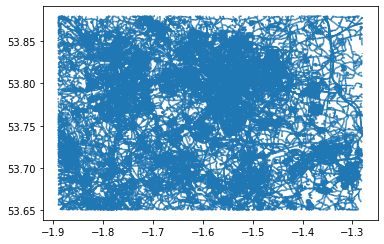

In [ ]:
# Plotting the total network for Leeds
leeds_total_network.plot() 

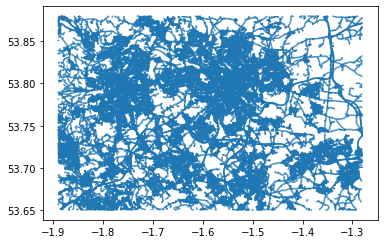

In [ ]:
# Plot the dirving network of Leeds
leeds_driving_network = osm.get_network(network_type='driving')
leeds_driving_network.plot()

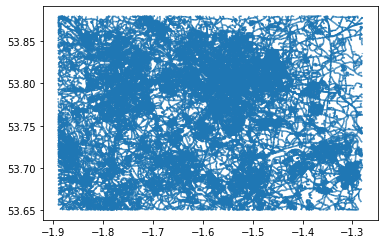

In [ ]:
# Here we request and plot ways that a friendly to pedestrians
leeds_walking_network = osm.get_network(network_type='walking')
leeds_walking_network.plot()

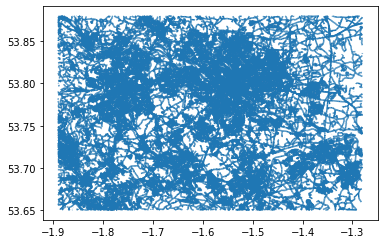

In [ ]:
# Here we request and plot ways that a friendly to cyclists
leeds_cycling_network = osm.get_network(network_type='cycling')
leeds_cycling_network.plot()

In [ ]:
print('all:', leeds_total_network.shape[0],
     '\ndriving:', leeds_driving_network.shape[0],
     '\nwalking:', leeds_walking_network.shape[0],
     '\ncycling:', leeds_cycling_network.shape[0])

all: 135546 
driving: 91739 
walking: 132737 
cycling: 105086


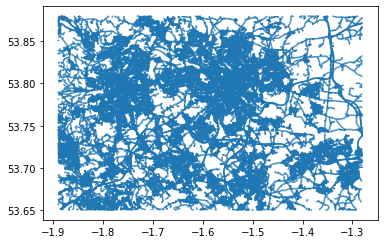

In [ ]:
test_driving_and_service = osm.get_network(network_type='driving+service')
test_driving_and_service.plot()

In [65]:
# Here we obtain an plot the building networks available in Leeds
#my_filter = {'building' : ['residential', 'retail']}
#leeds_total_buildings = osm.get_buildings(custom_filter = my_filter)
#leeds_total_buildings.plot()
help(osm.get_data_by_custom_criteria)

Help on method get_data_by_custom_criteria in module pyrosm.pyrosm:

get_data_by_custom_criteria(custom_filter, osm_keys_to_keep=None, filter_type='keep', tags_as_columns=None, keep_nodes=True, keep_ways=True, keep_relations=True, extra_attributes=None) method of pyrosm.pyrosm.OSM instance
    `
    Parse OSM data based on custom criteria.
    
    Parameters
    ----------
    
    custom_filter : dict (required)
        A custom filter to filter only specific POIs from OpenStreetMap.
    
    osm_keys_to_keep : str | list
        A filter to specify which OSM keys should be kept.
    
    filter_type : str
        "keep" | "exclude"
        Whether the filters should be used to keep or exclude the data from OSM.
    
    tags_as_columns : list
        Which tags should be kept as columns in the resulting GeoDataFrame.
    
    keep_nodes : bool
        Whether or not the nodes should be kept in the resulting GeoDataFrame if they are found.
    
    keep_ways : bool
        Whether or